In [1]:
!pip install konlpy

In [2]:
!pip install wordcloud

In [3]:
# 2025 서울시 교통정책 개요에 관한 기사 3종을 크롤링해 모두 한 텍스트 파일에 저장합니다.
import requests
from bs4 import BeautifulSoup

#[비즈월드] [2025 서울시의회④] 교통위원회 “2025년 시민들이 안전하고 편리하게 이용할 수 있는 교통정책 추진할 것”
url1="https://www.bizwnews.com/news/articleView.html?idxno=96271" 
#[서울시 미디어허브] 서울시, 2025년까지 도시철도 10개 노선 신설
url2="https://mediahub.seoul.go.kr/archives/887661"
#[CBNN] 서울시, 2024 대중교통 혁신 성과…시민 삶의 질 대폭 향상
url3="https://cbnn.co.kr/news/view.php?idx=735"

response = requests.get(url1)
soup = BeautifulSoup(response.text, 'html.parser')

article = soup.find('div', class_="article-body") 
text = article.get_text(strip=True)

# URL2는 자주 끊기는 관계로 반복문을 통해 파싱합니다.
response = requests.get(url2)
soup = BeautifulSoup(response.text, 'html.parser')

article = soup.find_all('p', class_="no") 
text2=''
for a in article:
    text2+=a.get_text(strip=True)

response = requests.get(url3)
soup = BeautifulSoup(response.text, 'html.parser')

article = soup.find('div', class_="fr-view") 
text3 = article.get_text(strip=True)

text3

text+=text2
text+=text3

with open("SeoulTransportArticle2025.txt", "w", encoding="utf-8") as f:
    f.write(text)

In [4]:
# re를 이용해 필요 없는 문자열을 제거하고 토큰화합니다.

import re
pattern=re.compile("[가-힣]+")
word_refined= pattern.findall(text)
print(word_refined)

['이병윤', '위원장', '시민들의', '안전을', '가장', '최우선으로', '한', '고품질의', '교통서비스', '제공이', '목표', '서울시의회', '교통위원회', '홈페이지', '사진', '서울시의회', '홈페이지', '캡처', '비즈월드', '서울시의회', '교통위원회', '이하', '교통위', '는', '교통실', '도시기반시설본부', '도시철도국', '서울교통공사', '서울시설공단의', '소관업무를', '관장하며', '서울시민에게', '편리한', '교통수단과', '안전한', '교통환경을', '제공하기', '위해', '서울시', '교통정책', '수립과', '조정을', '담당하고', '있다', '더불어', '버스와', '지하철', '등', '대중교통', '운행개선과', '택시정책', '수립', '장애인', '이동권', '보장과', '녹색교통', '확대', '도시철도', '기본계획', '수립과', '건설', '신속한', '교통', '정보', '제공과', '성숙한', '교통', '문화', '확대', '등', '도시', '교통', '전반에', '관한', '사항을', '관리', '감독하고', '지원하며', '서울시민들의', '편리한', '교통', '이용을', '위해', '불철주야', '노력', '중이다', '교통위는', '이병윤', '국민의힘', '동대문구', '위원장과', '이경숙', '국민의힘', '도봉구', '부위원장', '김성준', '더불어민주당', '금천구', '부위원장을', '필두로', '경기문', '국민의힘', '강서구', '위원', '곽향기', '국민의힘', '동작구', '위원', '김원중', '국민의힘', '성북구', '위원', '김지향', '국민의힘', '영등포구', '위원', '문성호', '국민의힘', '서대문구', '위원', '송도호', '더불어민주당', '관악구', '위원', '윤기섭', '국민의힘', '노원구', '위원', '윤영희', '국민의힘', '비례', '위원', '이원형', '더불어민주당', '비례', '위원', '정준

In [5]:
# 특수문자와 불용어를 수동으로 처리합니다.

stop_words=[
    # 개인 이름 / 기자명
    '이병윤', '이경숙', '김성준', '경기문', '곽향기', '김원중', '김지향',
    '문성호', '송도호', '윤기섭', '윤영희', '이원형', '정준호', '오세훈',
    '윤종장', '손진석', '손진석기자', '기자이병윤', '기자son76153',

    # 언론사 / 미디어 / 이메일
    '비즈월드', '비즈월드=손진석기자', '프로지벤', '영국', '독일', '관련기사', '관련기사☞알아두면',

    # 정당 / 의원 신분
    '국민의힘', '더불어민주당', '비례',

    # 사진 캡션·출처 표기
    '사진=서울시의회', '사진=손진석기자', '사진=서울시의회지난해',
    '사진=서울시의회한편',

    # 기타 불필요한 단어, 주석, 마크업
    '도움되는', '응원하기', '사례도', '강화키워드',
    '도움되는', '기틀을', '트램', '사회기반시설', '노동자',
    '이하', '홈페이지'    "사진","서울시의회","캡처","서울시의회지난해","손진석기자그동안",
    "과거","지금은","하나다","예컨대","프로젝트다","교통상식","알아두면","방송","서울시의회기후동행카드는",
    "서울시의회한편",'서울시',"시민","서울","위해","운영","이용","현재","사진",
    "진행","목선","예정","교통"]


fixed_token=[word for word in word_refined if word not in stop_words and len(word)>1]

joined_txt = " ".join(fixed_token)


In [6]:
# 단어들을 형태소로 나누어 분석합니다.
from konlpy.tag import Okt

okt=Okt()

word_dict=okt.pos(joined_txt)

print(word_dict)

[('위원장', 'Noun'), ('시민', 'Noun'), ('들', 'Suffix'), ('의', 'Josa'), ('안전', 'Noun'), ('을', 'Josa'), ('가장', 'Noun'), ('최', 'Noun'), ('우선', 'Noun'), ('으로', 'Josa'), ('고', 'Modifier'), ('품질', 'Noun'), ('의', 'Josa'), ('교통', 'Noun'), ('서비스', 'Noun'), ('제공', 'Noun'), ('이', 'Josa'), ('목표', 'Noun'), ('교통', 'Noun'), ('위원회', 'Noun'), ('홈페이지', 'Noun'), ('홈페이지', 'Noun'), ('교통', 'Noun'), ('위원회', 'Noun'), ('교통', 'Noun'), ('위', 'Noun'), ('교통', 'Noun'), ('실', 'Noun'), ('도시', 'Noun'), ('기반시설', 'Noun'), ('본부', 'Noun'), ('도시철도', 'Noun'), ('국', 'Noun'), ('서울', 'Noun'), ('교통', 'Noun'), ('공사', 'Noun'), ('서', 'Modifier'), ('울', 'Modifier'), ('시설', 'Noun'), ('공단', 'Noun'), ('의', 'Josa'), ('소관', 'Noun'), ('업무', 'Noun'), ('를', 'Josa'), ('관장', 'Noun'), ('하며', 'Verb'), ('서', 'Modifier'), ('울', 'Modifier'), ('시민', 'Noun'), ('에게', 'Josa'), ('편리한', 'Adjective'), ('교통', 'Noun'), ('수단', 'Noun'), ('과', 'Josa'), ('안전한', 'Adjective'), ('교통', 'Noun'), ('환경', 'Noun'), ('을', 'Josa'), ('제공', 'Noun'), ('하기', 'Verb'), ('교통', 'Nou

In [7]:
# 단어들의 빈도를 분석해 상위 20개 단어를 추출합니다.

from collections import Counter

words_noun=okt.nouns(joined_txt)

s_words=["교통","서울","서울시","사업","계획"]

word_rev=[word for word in words_noun if len(word)>1 and not word in s_words]

count=Counter(word_rev)

common=count.most_common(20)

print(common)

[('시민', 20), ('버스', 19), ('추진', 19), ('동행', 17), ('정책', 14), ('대중교통', 14), ('노선', 14), ('운영', 13), ('도시철도', 12), ('확대', 12), ('지하철', 11), ('건설', 11), ('위원', 11), ('이용', 10), ('민간', 10), ('카드', 10), ('구축', 10), ('위원회', 9), ('투자', 9), ('도입', 9)]


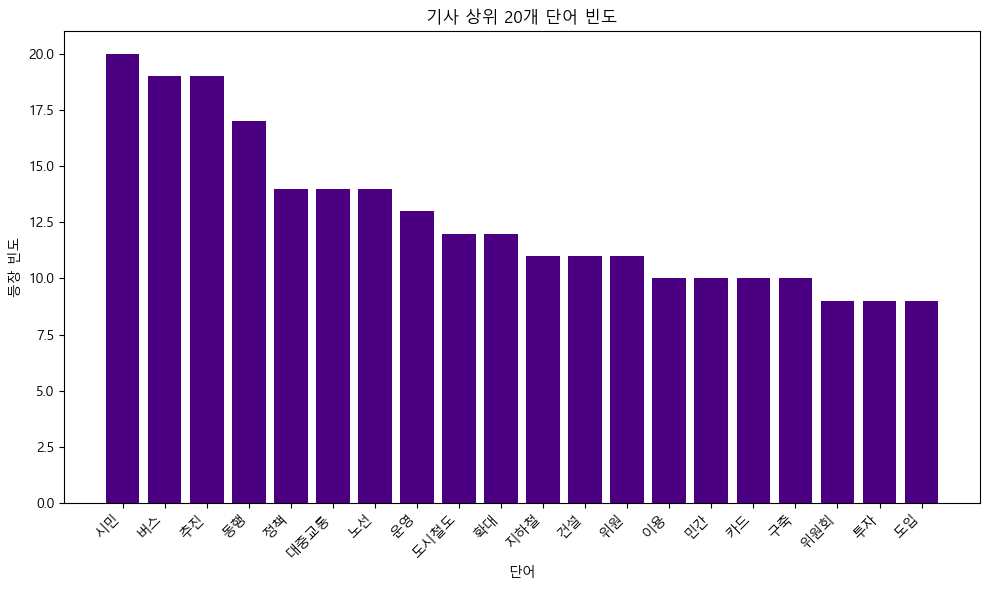

In [8]:
# 추출한 데이터를 시각화합니다.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words=[]
counts=[]
for rank in common:
    w,c= rank
    words.append(w)
    counts.append(c)

plt.rc('font',family="Malgun Gothic")
plt.figure(figsize=(10,6))

plt.bar(words,counts,color='indigo')
plt.xticks(rotation=45, ha='right')

plt.xlabel("단어")
plt.ylabel("등장 빈도")
plt.title("기사 상위 20개 단어 빈도")

plt.tight_layout()

plt.show()


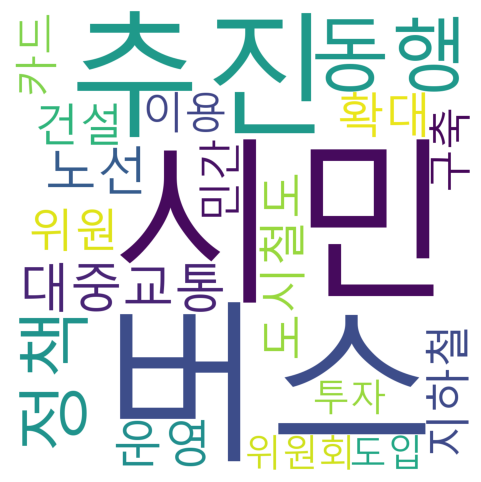

In [9]:
cloud=WordCloud(font_path="C:\Windows\Fonts\malgun.ttf",background_color="white",
               width=400,height=400,scale=3.0,max_font_size=150)

Wcloud=cloud.generate_from_frequencies(dict(common))

plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(Wcloud)

### 분석 결과 "시민", "버스","대중교통" 키워드가 많은 것이 확인되어 기사들에서 서울시의 대중교통 분담의지를 다시 확인할 수 있었습니다.

* 이 자연어 분석은 행정학도로서 정책의 방향성을 빠르게 이해하고 이를 다시 정책 환경에 환류할 수 있다는 점에서 유용합니다. 
* 그 중에서 "시민", "카드","이용" "동행"이라는 키워드는 서울시의 최근 교통정책 기조가 서민들의 대중교통 이용을 장려하는 방향으로 이루어졌음을 확인할 수 있습니다.
* "민간", "투자"라는 키워드가 올라온 것은 최근 서울시 교통정책에서 재원 조달의 트렌드가 민간 투자 유치로 바뀌었음을 의미합니다.
* 최근 서울시가 지하철 건설에 소극적으로 바뀌었다는 예상과 달리 "건설", "도입","구축","운영" 등 철도교통의 적극적인 확대를 시사하는 단어들도 많이 발견되었습니다.